In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler 
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Loading and Exploratory Data 

In [43]:
cust_set=pd.read_csv("/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv")

In [44]:
cust_set.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [45]:
cust_set.info()
#non_null_value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [46]:
cust_set.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.88,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.97,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.26,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.82,1.0,34.75,50.0,73.00,99.0


In [47]:
#drop unneccesary feature
cust_set.drop('CustomerID' , axis=1 , inplace=True)

In [48]:
cust_set["Gender"].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [49]:
cus_set=cust_set.rename(columns={'Annual Income (k$)':'Annual_Income' ,'Spending Score (1-100)':"Spending_Score" })

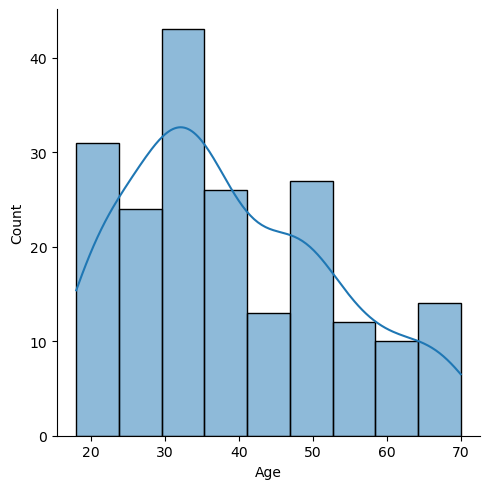

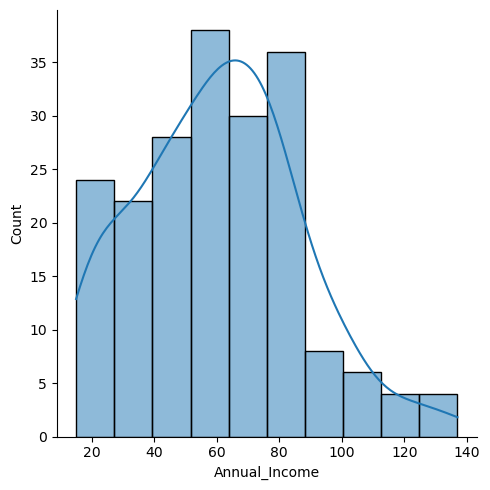

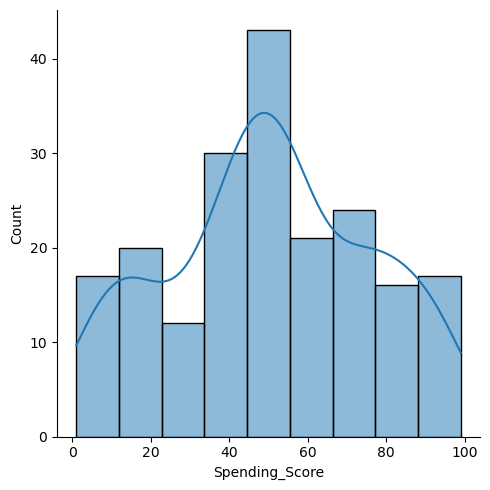

In [50]:
for col in cus_set.select_dtypes(include='int64').columns:
    sns.displot( data=cus_set , x=col , kde=True)

<Axes: xlabel='Gender', ylabel='Annual_Income'>

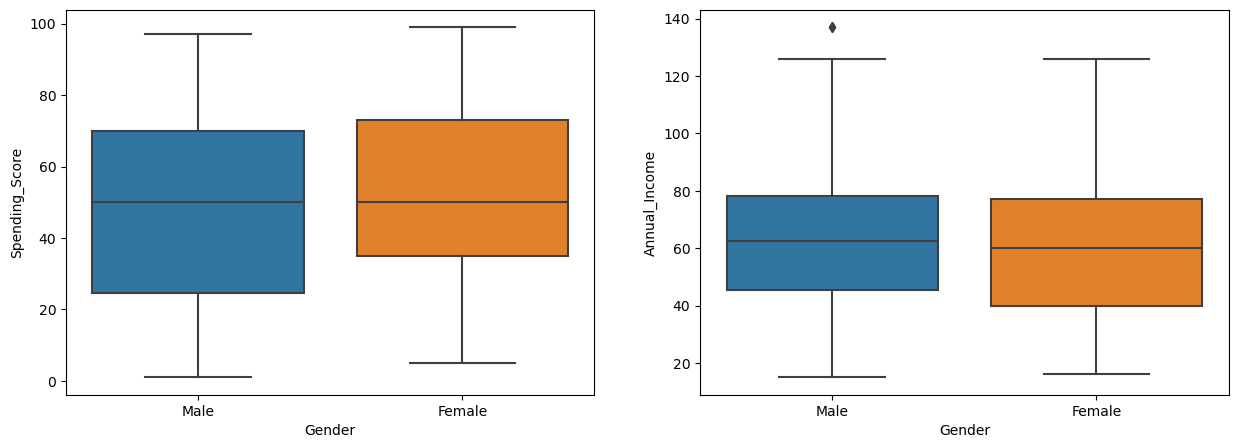

In [51]:
fig , axes= plt.subplots(nrows=1 , ncols=2 , figsize=(15 , 5))
sns.boxplot(y='Spending_Score' , x='Gender',data=cus_set , ax=axes[0])
sns.boxplot(y='Annual_Income' , x='Gender',data=cus_set , ax=axes[1])


In [65]:
cus_set.corr()

/tmp/ipykernel_32/456275280.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cus_set.corr()


,Age,Annual_Income,Spending_Score
Age,1.000000,-0.012398,-0.327227
Annual_Income,-0.012398,1.000000,0.009903
Spending_Score,-0.327227,0.009903,1.000000


<Axes: xlabel='Gender', ylabel='count'>

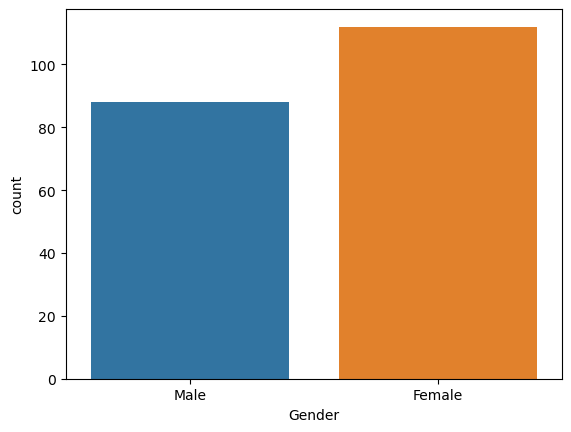

In [53]:
sns.countplot(x='Gender' , data=cus_set)

<Axes: xlabel='Spending_Score', ylabel='Annual_Income'>

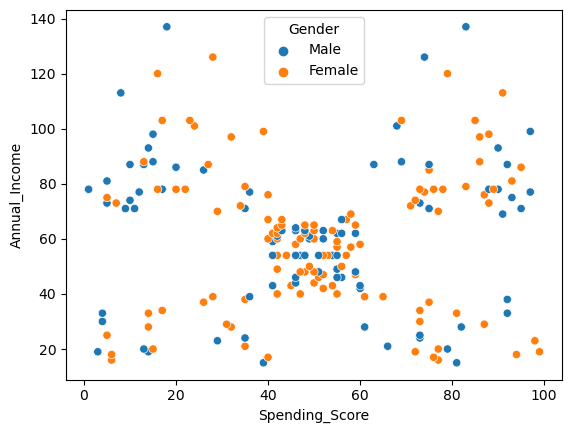

In [54]:
sns.scatterplot(x='Spending_Score' , y='Annual_Income' , hue='Gender',data=cus_set)

# Training 

## split_train_test

In [55]:
X_train, X_test= train_test_split(cus_set,test_size=0.1, random_state=44, shuffle =True)

## Preprocessing

In [56]:
list_number=list(cus_set.select_dtypes(include='int64').columns)
list_cat= ['Gender']

In [57]:
preprocess=ColumnTransformer([
    
    ('minxmax' , MinMaxScaler() , list_number),
    ('1hot' , OneHotEncoder() ,list_cat)

])
x_train_pre=preprocess.fit_transform(X_train)

In [69]:
interia = []
for i in range(1,10):
    kmeans= KMeans(n_clusters=i, init='k-means++', random_state=44)
    kmeans.fit(x_train_pre[: , [1 ,2]])
    interia.append(kmeans.inertia_)
interia

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

[21.435418284916395,
 12.884821226993777,
 8.34607149083366,
 5.533801599032261,
 3.3368221729443226,
 2.871567222422546,
 2.4200403296200483,
 2.0291935443540687,
 1.6999290855387965]

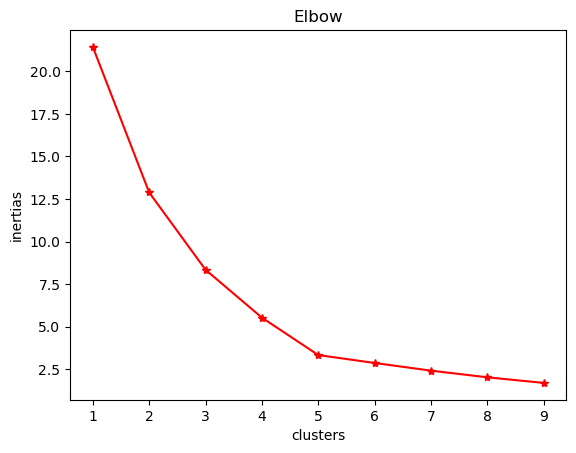

In [71]:
plt.plot(range(1,10),interia,marker='*',c='r')
plt.title('Elbow')
plt.xlabel('clusters')
plt.ylabel('inertias')
plt.show()

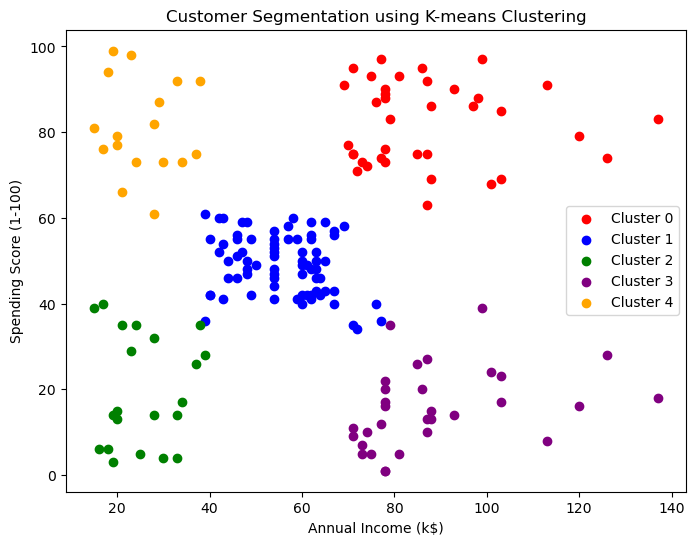

In [72]:
kmeans = KMeans(n_clusters=5, n_init=10,init='k-means++', random_state=42)
kmeans.fit(x_train_pre[: , [1 ,2]])
labels=kmeans.labels_
X_train['Cluster'] = labels
plt.figure(figsize=(8, 6))
colors = ['red', 'blue', 'green', 'purple', 'orange']
for i in range(len(colors)):
    cluster_data = X_train[X_train['Cluster'] == i]
    plt.scatter(cluster_data['Annual_Income'], cluster_data['Spending_Score'],
                c=colors[i], label=f'Cluster {i}')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segmentation using K-means Clustering')
plt.legend()
plt.show()